In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('HousingData.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df = df.fillna(df.mean())

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

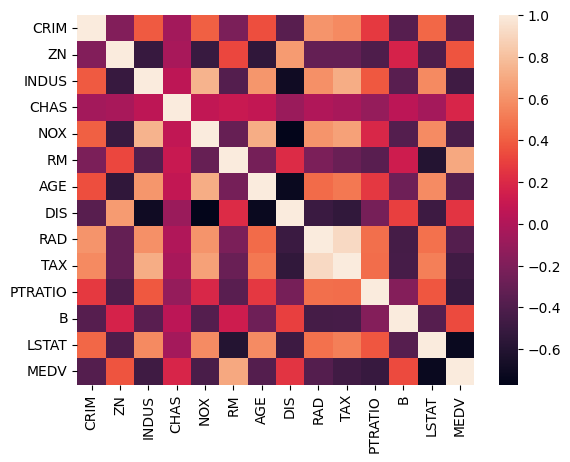

In [7]:
sns.heatmap(df.corr())

<Axes: >

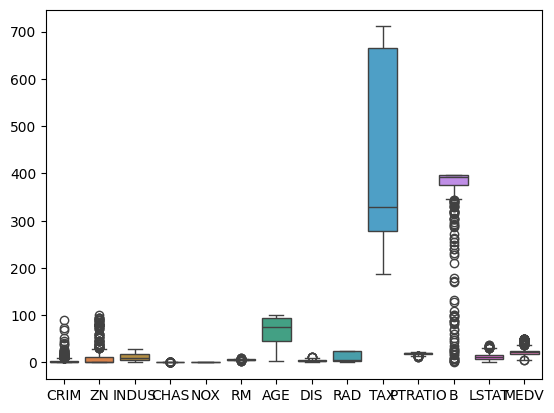

In [8]:
sns.boxplot(data = df)

Only LSTAT and RM are distinguishing features.
Both have extreme correlation with the MEDV.

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [10]:
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] <= lower_bound) | (df[column] >= upper_bound)][column].tolist()
    return outliers
    

In [11]:
print(get_outliers(df,'MEDV'))

[38.7, 43.8, 41.3, 50.0, 50.0, 50.0, 50.0, 37.2, 39.8, 37.9, 50.0, 37.0, 50.0, 42.3, 48.5, 50.0, 44.8, 50.0, 37.6, 46.7, 41.7, 48.3, 42.8, 44.0, 50.0, 43.1, 48.8, 50.0, 43.5, 45.4, 46.0, 50.0, 37.3, 50.0, 50.0, 50.0, 50.0, 50.0, 5.0, 5.0]


In [12]:
print(get_outliers(df,'CRIM'))

[8.98296, 13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337]


In [13]:
# def remove_outliers(column):
#     global df
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.25)
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & df[column] <= upper_bound]

In [14]:
# columns = list(df.columns.unique())
# columns

In [15]:
# for i in range(len(columns)):
#     remove_outliers(columns[i])

In [16]:
# sns.boxplot(data = df)

In [17]:
# df.head()

In [18]:
# df

In [19]:
# df.shape

In [20]:
zscore = np.abs(stats.zscore(df))
zscore

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.422328,0.296443,1.311010,0.279851,0.144217,0.413672,1.210593e-01,0.140214,0.982843,0.666608,1.459000,0.441052,1.104146,0.159686
1,0.419870,0.489639,0.599771,0.279851,0.740262,0.194274,3.787156e-01,0.557160,0.867883,0.987329,0.303094,0.441052,0.510353,0.101524
2,0.419872,0.489639,0.599771,0.279851,0.740262,1.282714,2.706270e-01,0.557160,0.867883,0.987329,0.303094,0.396427,1.239748,1.324247
3,0.419277,0.489639,1.330435,0.279851,0.835284,1.016303,8.287698e-01,1.077737,0.752922,1.106115,0.113032,0.416163,1.395333,1.182758
4,0.414981,0.489639,1.330435,0.279851,0.835284,1.228577,5.223385e-01,1.077737,0.752922,1.106115,0.113032,0.441052,0.000000,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.415733,0.489639,0.126411,0.279851,0.158124,0.439316,2.121240e-02,0.625796,0.982843,0.803212,1.176466,0.387217,0.000000,0.014454
502,0.417766,0.489639,0.126411,0.279851,0.158124,0.234548,2.984598e-01,0.716639,0.982843,0.803212,1.176466,0.441052,0.518917,0.210362
503,0.415952,0.489639,0.126411,0.279851,0.158124,0.984960,8.201227e-01,0.773684,0.982843,0.803212,1.176466,0.441052,1.009938,0.148802
504,0.410232,0.489639,0.126411,0.279851,0.158124,0.725672,7.581068e-01,0.668437,0.982843,0.803212,1.176466,0.403225,0.890038,0.057989


In [21]:
df1 = df[(zscore < 4).all(axis=1)]

In [22]:
df1.shape

(499, 14)

## Training the dataset with the single and multiple variables.

In [23]:
X = pd.DataFrame(np.c_[df1['LSTAT']], columns = ['LSTAT'])
# X = np.asarray([df['LSTAT']])
# df1.drop(['MEDV'], axis = 1) 
# print(df1)
# X = np.asarray(df1.drop(['CRIM',	'ZN',	'INDUS',    'CHAS', 	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B'], axis = 1))
# print(X)
Y = df1['MEDV']
# print(Y)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
y_pred = lin_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

b1 = lin_model.coef_[0]
b0 = lin_model.intercept_

print(b1)
print(b0)

Mean Squared Error: 27.586672657665876
R2 Score: 0.5577056920176198
-0.9567877110334314
34.87991137629288


Linear regression using single Independent variable

In [27]:
xi = df1['RM']
yi = df1['MEDV']
xi_mean = np.mean(xi)
yi_mean = np.mean(yi)

pro_mean_diff = np.sum((xi - xi_mean) * (yi - yi_mean))
mean_diff_sq = np.sum((xi - xi_mean)**2)

b1 = pro_mean_diff / mean_diff_sq
print(b1)


9.049103835885145


In [28]:
b0 = yi_mean - (b1 * xi_mean)
print(b0)

-34.2158451983599


In [29]:
# from sklearn.preprocessing import MinMaxScaler
# normalize = ['LSTAT', 'RM']
# scaler = MinMaxScaler()
# df1.loc[:, normalize] = scaler.fit_transform(df1[normalize])

In [30]:
# X1 = pd.DataFrame(np.c_[df1['LSTAT'], df1['RM']], columns = ['LSTAT','RM'])
X1 = df1[['LSTAT', 'RM']]
Y1 = df1['MEDV']

In [31]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state=5)

In [32]:
lin_model.fit(X_train1, Y_train1)

LinearRegression()

In [33]:
y_pred = lin_model.predict(X_test1)
mse = mean_squared_error(Y_test1, y_pred)
r2 = r2_score(Y_test1, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

b1 = lin_model.coef_[0]
b0 = lin_model.intercept_

print(b1)
print(b0)

Mean Squared Error: 18.967582489612372
R2 Score: 0.6958946852544545
-0.6302388058789372
-2.4787766797951285


 With the feature 'RM' we've got the positively increasing slope. (9.04)
 For both the features 'RM' and 'LSTAT' we've got decreasing slope (-0.63)